In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('master_df.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,Renovated,year,month,age_when_sold
0,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,1,1,2014,12,63
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,0,2015,2,82
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,1,0,2014,12,49
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,0,2015,2,28
4,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,...,98053,47.6561,-122.005,4760,101930,1,0,2014,5,13


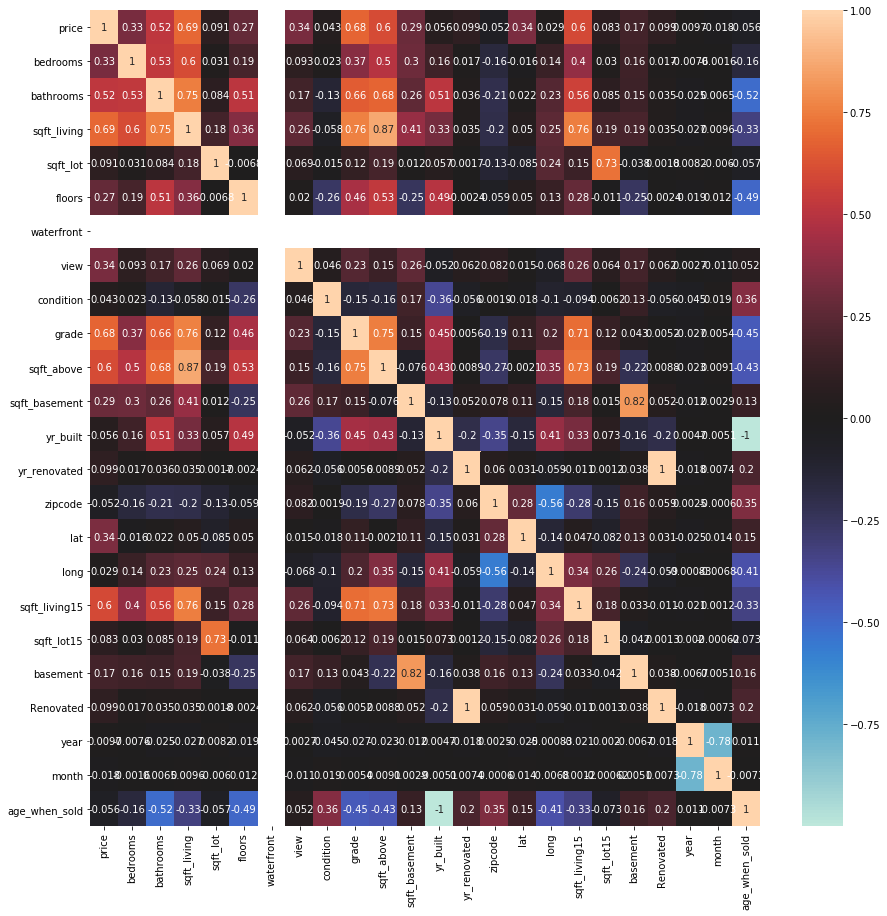

In [3]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), center=0, annot =True);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [5]:
cor_df = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
cor_df.info()
cor_df.drop_duplicates(inplace = True)
cor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 496
Data columns (total 3 columns):
level_0    529 non-null object
level_1    529 non-null object
0          529 non-null float64
dtypes: float64(1), object(2)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 496
Data columns (total 3 columns):
level_0    529 non-null object
level_1    529 non-null object
0          529 non-null float64
dtypes: float64(1), object(2)
memory usage: 16.5+ KB


In [11]:
cor_df.loc[(cor_df[0] > .55) & (cor_df[0] < 1)]

,level_0,level_1,0
295,yr_renovated,Renovated,0.999968
449,Renovated,yr_renovated,0.999968
517,age_when_sold,yr_built,0.999874
275,yr_built,age_when_sold,0.999874
78,sqft_living,sqft_above,0.874108
210,sqft_above,sqft_living,0.874108
424,basement,sqft_basement,0.824394
248,sqft_basement,basement,0.824394
503,month,year,0.781713
481,year,month,0.781713


In [18]:
test_df1 = df[['price', 'Renovated', 'sqft_living', 'condition', 'grade', 'bedrooms']]

In [13]:
test_df1.head()

,price,Renovated,sqft_living,condition,grade,bedrooms
0,538000.0,1,2570,3,7,3
1,180000.0,0,770,3,6,2
2,604000.0,0,1960,5,7,4
3,510000.0,0,1680,3,8,3
4,1230000.0,0,5420,3,11,4


In [21]:
test_df1['bedrooms'].max()
cat = 'bedrooms'

In [22]:
test_df1[cat] = test_df1[cat].apply(pd.Categorical)

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
test_df1.head()

,price,Renovated,sqft_living,condition,grade,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11
0,538000.0,1,2570,3,7,0,1,0,0,0,0,0,0,0,0
1,180000.0,0,770,3,6,1,0,0,0,0,0,0,0,0,0
2,604000.0,0,1960,5,7,0,0,1,0,0,0,0,0,0,0
3,510000.0,0,1680,3,8,0,1,0,0,0,0,0,0,0,0
4,1230000.0,0,5420,3,11,0,0,1,0,0,0,0,0,0,0


In [25]:
test_df1 = pd.get_dummies(test_df1, drop_first = True)

In [27]:
target = 'price'
x_cols = list(test_df1.columns)
x_cols.remove(target)

In [29]:
X = test_df1[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('Renovated', 1.0387847884224273),
 ('sqft_living', 19.1415061562469),
 ('condition', 23.718277483601568),
 ('grade', 78.62985512172646),
 ('bedrooms_2', 8.283544418705342),
 ('bedrooms_3', 28.56521942404234),
 ('bedrooms_4', 21.665295430405823),
 ('bedrooms_5', 5.853346941236654),
 ('bedrooms_6', 1.7285888954237125),
 ('bedrooms_7', 1.1276427626723962),
 ('bedrooms_8', 1.0410660835484424),
 ('bedrooms_9', 1.0187358967725566),
 ('bedrooms_10', 1.0102420972179942),
 ('bedrooms_11', 1.00423403278938)]

In [37]:
train, test = train_test_split(test_df1)

In [38]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1360.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:02:45   Log-Likelihood:            -1.9548e+05
No. Observations:               14290   AIC:                         3.910e+05
Df Residuals:                   14275   BIC:                         3.911e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.622e+05   2.57e+04    -29.698      0.000   -8.13e+05   -7.12e+05
Renovated    1.628e+05   1.02e+04     16.009      0.000    1.43e+05    1.83e+05
sqft_living   161.7367      3.653     44.274      0.000     154.576     168.897
condition    6.977e+04   2764.693     25.234      0.000    6.43e+04    7.52e+04
grade        1.144e+05   2460.163     46.508      0.000     1.1e+05    1.19e+05
bedrooms_2  -6.312e+04   1.99e+04     -3.176      0.001   -1.02e+05   -2.42e+04
bedrooms_3  -1.664e+05   1.96e+04     -8.509      0.000   -2.05e+05   -1.28e+05
bedrooms_4  -1.941e+05   1.99e+04     -9.740      0.000   -2.33e+05   -1.55e+05
bedrooms_5  -1.731e+05    2.1e+04     -8.246      0.000   -2.14e+05   -1.32e+05
bedrooms_6  -1.688e+05   2.64e+04     -6.384      0.000   -2.21e+05   -1.17e+05
bedrooms_7  -2.181e+05   4.64e+04     -4.704      0.000   -3.09e+05   -1.27e+05
bedrooms_8  -3.841e+04   7.75e+04     -0.496      0.620    -1.9e+05    1.13e+05
bedrooms_9  -1.359e+05   1.08e+05     -1.262      0.207   -3.47e+05    7.52e+04
bedrooms_10 -1.503e+05   1.24e+05     -1.214      0.225   -3.93e+05    9.23e+04
bedrooms_11  -3.76e+05   2.12e+05     -1.770      0.077   -7.92e+05    4.05e+04
==============================================================================
Omnibus:                     6443.363   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66337.734
Skew:                           1.899   Prob(JB):                         0.00
Kurtosis:                      12.848   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""